# Weather Prediction

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.preprocessing import RobustScaler

In [2]:
# Load the dataset
df = pd.read_excel('W Data.xlsx')
df

,country,location_name,timezone,last_updated,temperature_celsius,condition_text,wind_kph,wind_degree,wind_direction,pressure_in,precip_in,humidity,cloud,feels_like_celsius,visibility_km
0,India,New Delhi,Asia/Nicosia,2023-08-29 15:00:00,34.0,Mist,6.8,250,WSW,29.65,0,50,50,33.4,5.0
1,India,New Delhi,Asia/Nicosia,2023-08-30 08:30:00,29.0,Mist,11.2,260,W,29.74,0,66,25,29.6,3.5
2,India,New Delhi,Asia/Nicosia,2023-08-31 05:15:00,29.0,Mist,3.6,211,SSW,29.74,0,70,25,30.4,3.5
3,India,New Delhi,Asia/Nicosia,2023-09-01 05:15:00,29.0,Mist,6.8,270,W,29.71,0,79,0,30.3,3.2
4,India,New Delhi,Asia/Nicosia,2023-09-02 05:00:00,31.3,Clear,12.6,274,W,29.64,0,38,6,31.5,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,India,New Delhi,Asia/Nicosia,2023-12-02 00:45:00,20.8,Partly cloudy,6.1,348,NNW,29.99,0,49,26,20.9,10.0
92,India,New Delhi,Asia/Nicosia,2023-12-04 02:00:00,18.0,Mist,3.6,10,N,30.03,0,83,75,18.0,1.6
93,India,New Delhi,Asia/Nicosia,2023-12-06 01:15:00,14.0,Mist,3.6,10,N,30.03,0,82,0,13.8,1.5
94,India,New Delhi,Asia/Nicosia,2023-12-07 01:15:00,16.0,Mist,3.6,10,N,30.03,0,72,0,16.0,2.8


In [3]:
# it give information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   country              96 non-null     object        
 1   location_name        96 non-null     object        
 2   timezone             96 non-null     object        
 3   last_updated         96 non-null     datetime64[ns]
 4   temperature_celsius  96 non-null     float64       
 5   condition_text       96 non-null     object        
 6   wind_kph             96 non-null     float64       
 7   wind_degree          96 non-null     int64         
 8   wind_direction       96 non-null     object        
 9   pressure_in          96 non-null     float64       
 10  precip_in            96 non-null     int64         
 11  humidity             96 non-null     int64         
 12  cloud                96 non-null     int64         
 13  feels_like_celsius   96 non-null     

In [4]:
# check the missing values
df.isnull().sum()

country                0
location_name          0
timezone               0
last_updated           0
temperature_celsius    0
condition_text         0
wind_kph               0
wind_degree            0
wind_direction         0
pressure_in            0
precip_in              0
humidity               0
cloud                  0
feels_like_celsius     0
visibility_km          0
dtype: int64

In [5]:
# check duplicated values
df[df.duplicated()]

,country,location_name,timezone,last_updated,temperature_celsius,condition_text,wind_kph,wind_degree,wind_direction,pressure_in,precip_in,humidity,cloud,feels_like_celsius,visibility_km


In [6]:
# drop null values
df.dropna()

,country,location_name,timezone,last_updated,temperature_celsius,condition_text,wind_kph,wind_degree,wind_direction,pressure_in,precip_in,humidity,cloud,feels_like_celsius,visibility_km
0,India,New Delhi,Asia/Nicosia,2023-08-29 15:00:00,34.0,Mist,6.8,250,WSW,29.65,0,50,50,33.4,5.0
1,India,New Delhi,Asia/Nicosia,2023-08-30 08:30:00,29.0,Mist,11.2,260,W,29.74,0,66,25,29.6,3.5
2,India,New Delhi,Asia/Nicosia,2023-08-31 05:15:00,29.0,Mist,3.6,211,SSW,29.74,0,70,25,30.4,3.5
3,India,New Delhi,Asia/Nicosia,2023-09-01 05:15:00,29.0,Mist,6.8,270,W,29.71,0,79,0,30.3,3.2
4,India,New Delhi,Asia/Nicosia,2023-09-02 05:00:00,31.3,Clear,12.6,274,W,29.64,0,38,6,31.5,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,India,New Delhi,Asia/Nicosia,2023-12-02 00:45:00,20.8,Partly cloudy,6.1,348,NNW,29.99,0,49,26,20.9,10.0
92,India,New Delhi,Asia/Nicosia,2023-12-04 02:00:00,18.0,Mist,3.6,10,N,30.03,0,83,75,18.0,1.6
93,India,New Delhi,Asia/Nicosia,2023-12-06 01:15:00,14.0,Mist,3.6,10,N,30.03,0,82,0,13.8,1.5
94,India,New Delhi,Asia/Nicosia,2023-12-07 01:15:00,16.0,Mist,3.6,10,N,30.03,0,72,0,16.0,2.8


# Exploratory Data Analysis

In [7]:
# only numerical columns
numerical_columns = ['temperature_celsius', 'wind_kph', 'wind_degree', 'pressure_in', 
                     'precip_in', 'humidity', 'cloud', 'feels_like_celsius', 
                     'visibility_km']

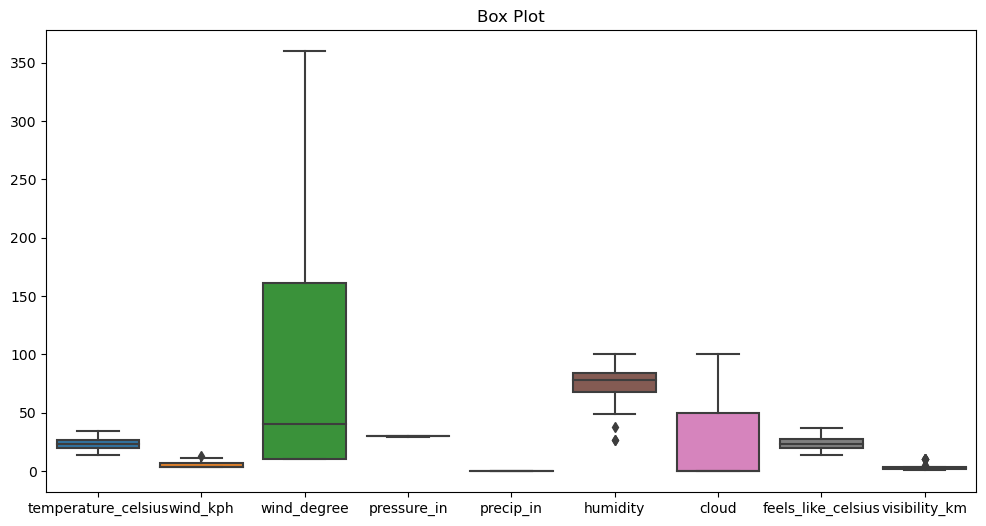

In [8]:
# Box plot : Detect the outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.title("Box Plot")
plt.show()

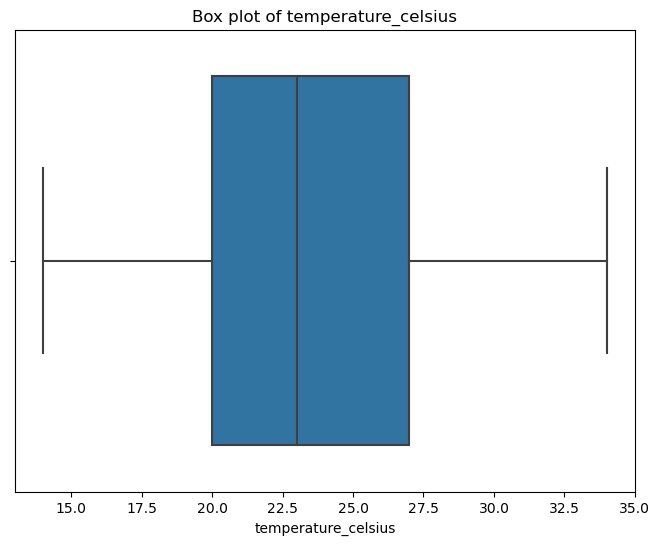

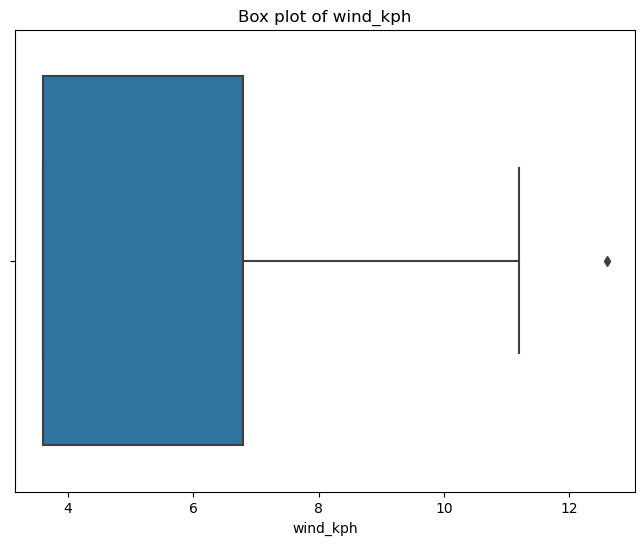

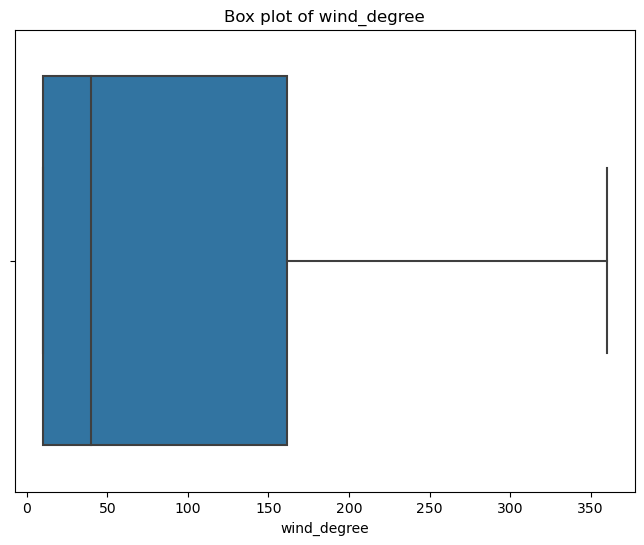

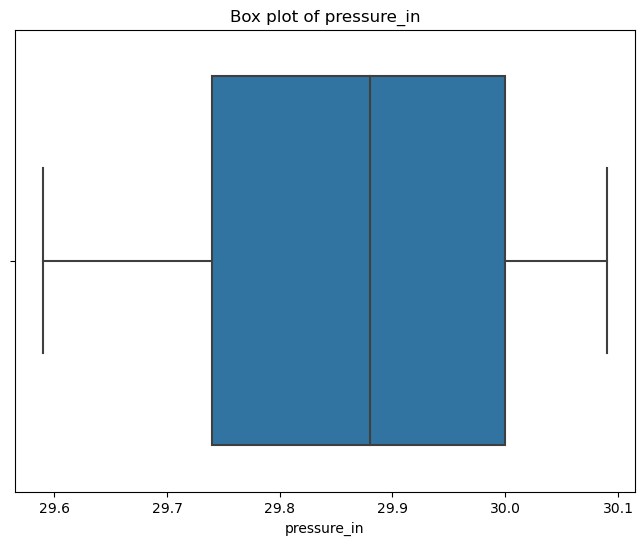

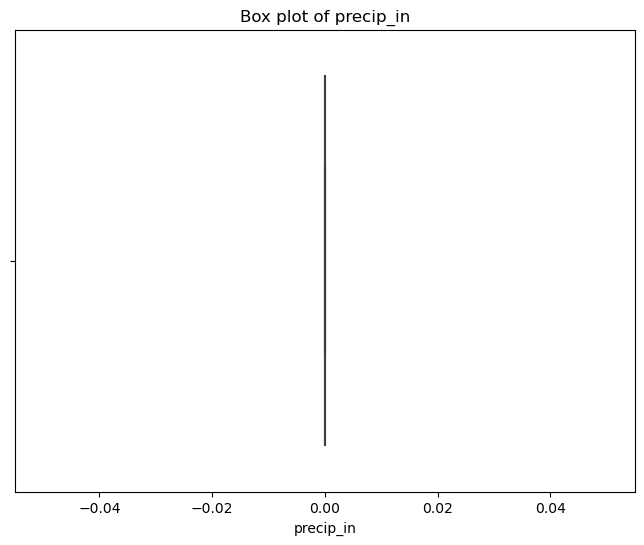

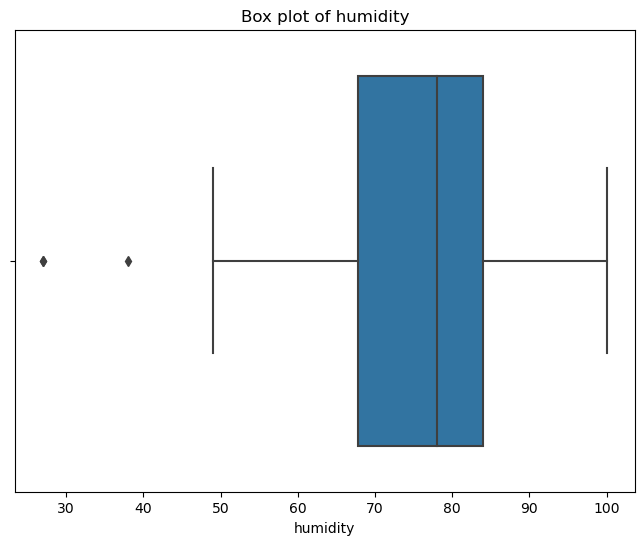

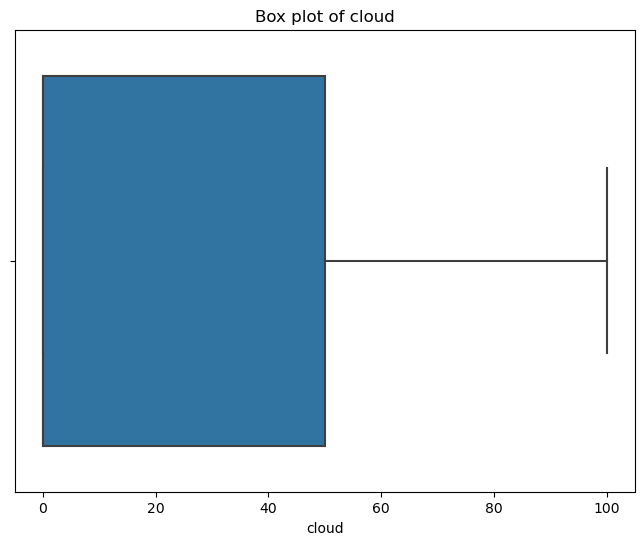

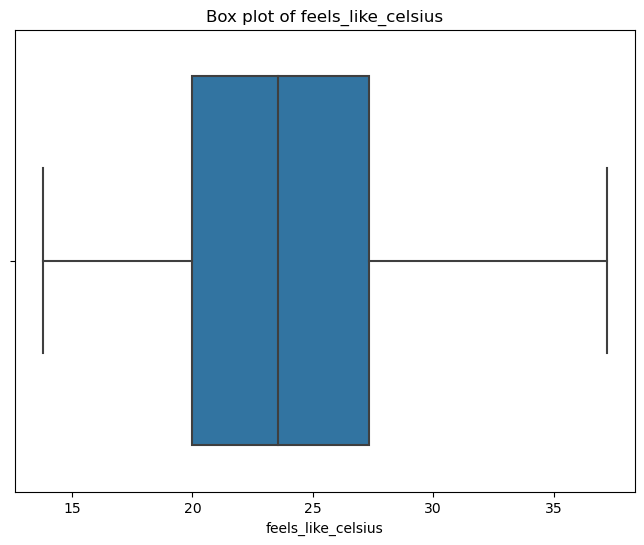

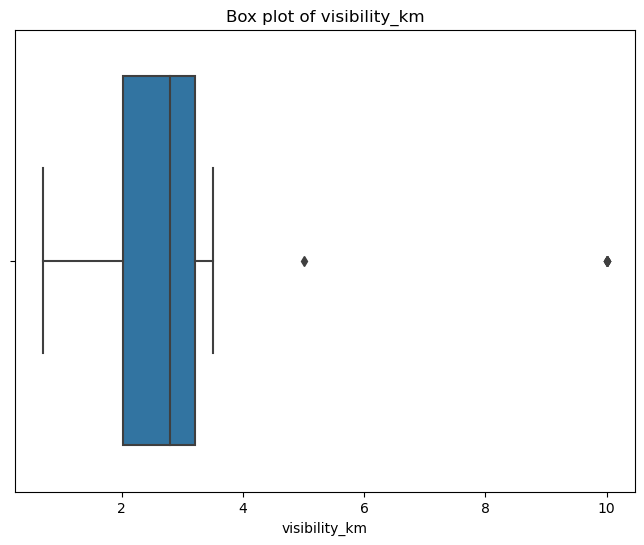

In [9]:
# Box plots 
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.show()

# Descriptive statistics

In [10]:
# Assuming your DataFrame is named 'df'
# You can use df.describe() for numerical columns and df[column].value_counts() for categorical columns
print(df.describe())  # Summary statistics for numerical columns


       temperature_celsius   wind_kph  wind_degree  pressure_in  precip_in  \
count            96.000000  96.000000    96.000000    96.000000       96.0   
mean             23.044792   5.336458    97.239583    29.854167        0.0   
std               4.666360   2.391657   109.834971     0.148109        0.0   
min              14.000000   3.600000    10.000000    29.590000        0.0   
25%              20.000000   3.600000    10.000000    29.740000        0.0   
50%              23.000000   3.600000    40.000000    29.880000        0.0   
75%              27.000000   6.800000   161.500000    30.000000        0.0   
max              34.000000  12.600000   360.000000    30.090000        0.0   

         humidity       cloud  feels_like_celsius  visibility_km  
count   96.000000   96.000000           96.000000      96.000000  
mean    76.218750   23.354167           23.604167       2.884375  
std     14.327157   29.272577            5.283498       1.858031  
min     27.000000    0.000000

# Check the distribution

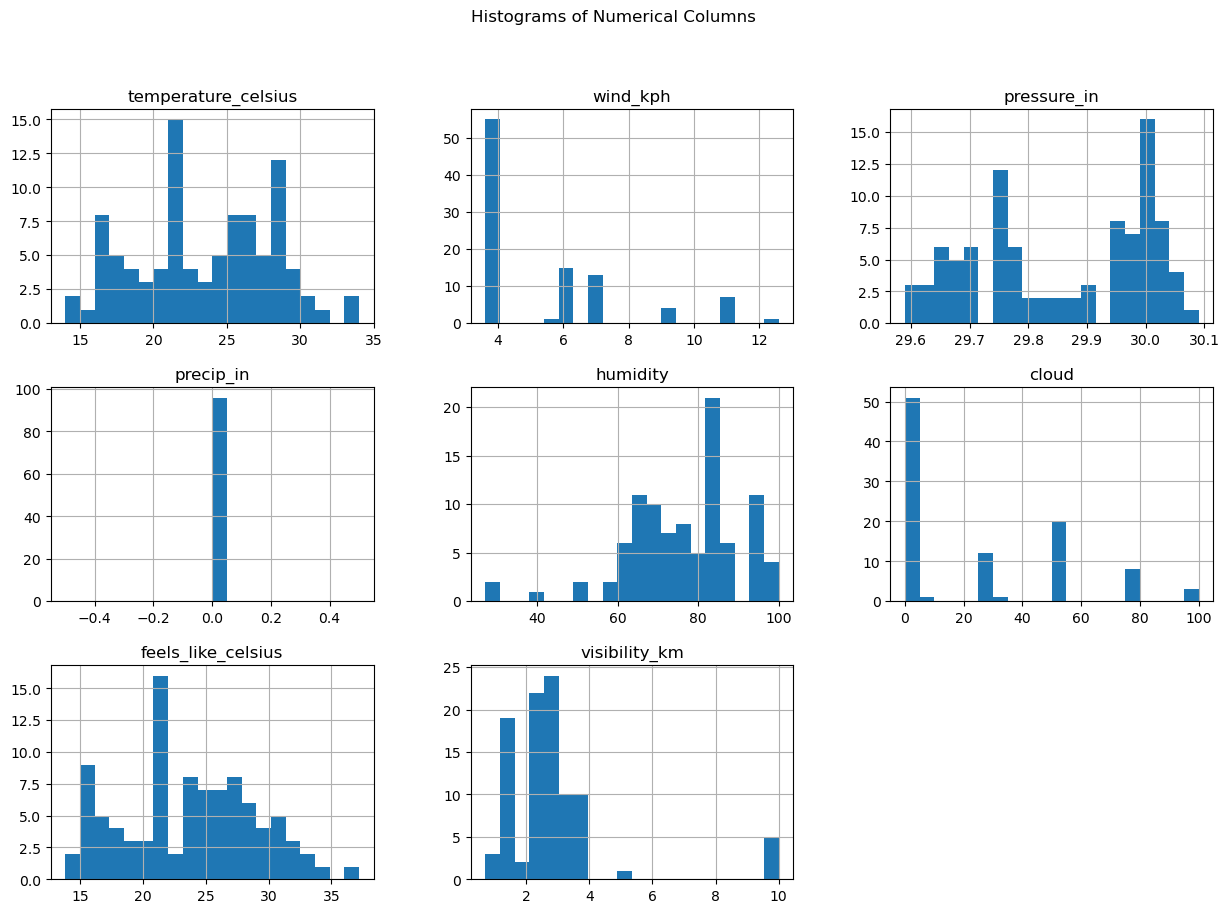

In [11]:

# Histograms for numerical columns
numerical_columns = ['temperature_celsius', 'wind_kph', 'pressure_in', 'precip_in', 
                     'humidity', 'cloud', 'feels_like_celsius', 'visibility_km']
df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns')
plt.show()



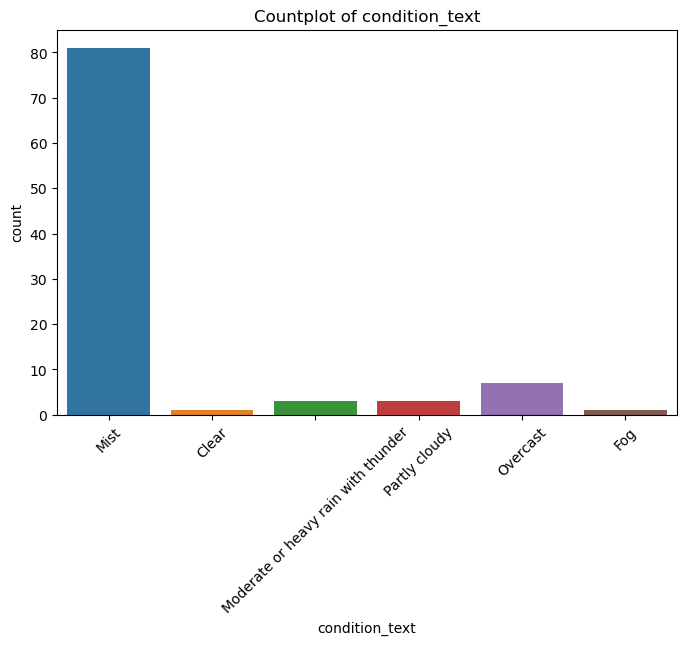

In [12]:
# Bar plots for categorical columns
categorical_columns = ['condition_text']
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.show()


#### Interpretation :
    From the above figure we can observe that the condition text is high in mist condition.

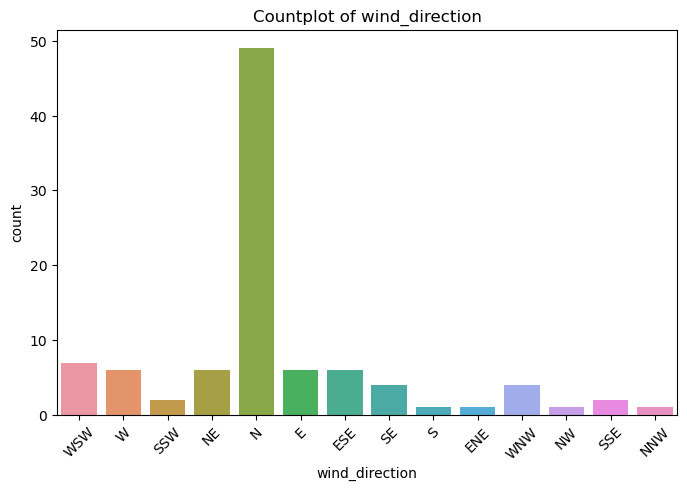

In [13]:
# Bar plots for categorical columns
categorical_columns = ['wind_direction']
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.show()


#### Interpretation :
    From the above figure we can observe that the wind direction is high in North direction.

# Correlation Heatmap

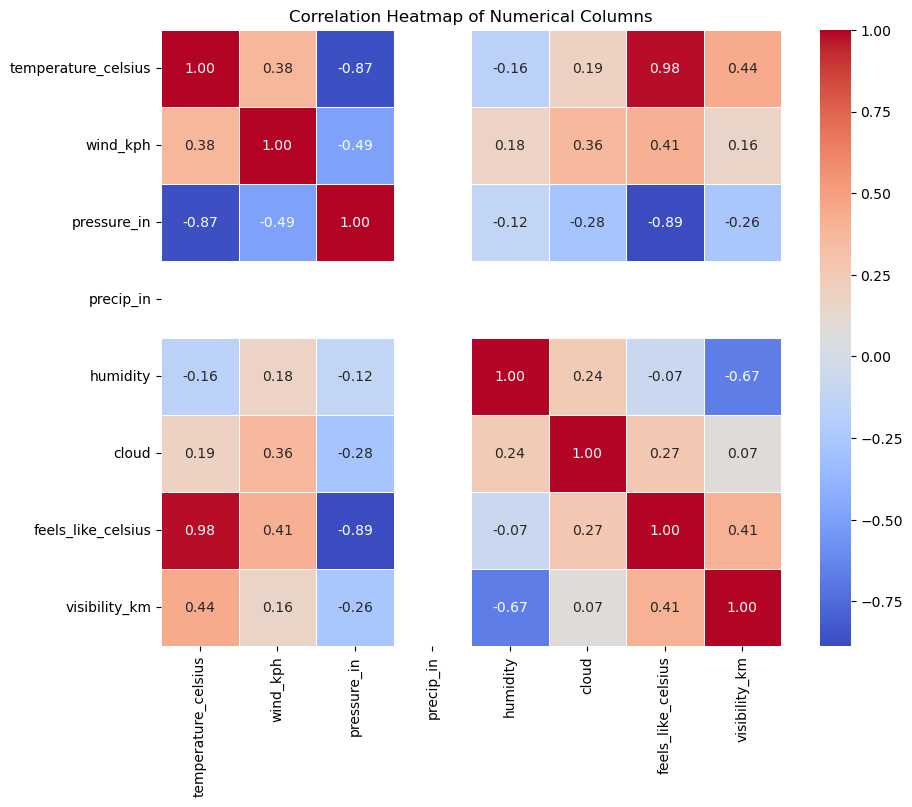

In [14]:
# Correlation matrix and heatmap for numerical columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


Interpretation :
    From the above heatmap results we can see temperature_celsius correlated with feels_like_celsius is highly correlated with each other.

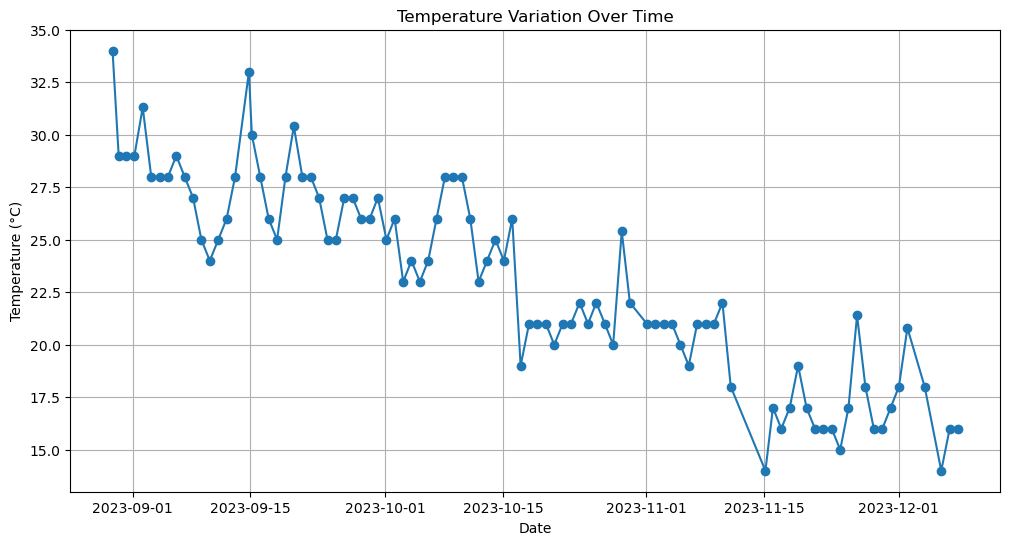

In [15]:
# Assuming 'last_updated' is a timestamp column
df['last_updated'] = pd.to_datetime(df['last_updated'])
plt.figure(figsize=(12, 6))
plt.plot(df['last_updated'], df['temperature_celsius'], marker='o', linestyle='-')
plt.title('Temperature Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


#### Interpretation :
    From the above figure we can observe that the tempuratue is decrease.

# Ordinal Logistic regression
    Ordinal logistic regression is used to model the relationship between an ordered multilevel dependent variable and independent variables. In the modeling, values of the dependent variable have a natural order or ranking. 

In [16]:
pip install mord

#### Coding on condition text column 
    Clear = 0
    Fog = 1
    mist =2 
    Moderate or heavy rain with thunder = 3
    overcast = 4
    partly cloudy = 5

    Here we use variable selection method for better result, we check which column condition text is related to this column by using R programming. Then we got 4 columns 'visibility_km', 'pressure_in', 'cloud', 'wind_kph'.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from mord import LogisticAT
from sklearn.metrics import accuracy_score

# Load your dataset (assuming it's already loaded into weather_data DataFrame)
weather_data = pd.read_excel('coding(W data).xlsx')

# Define independent variables (X) and dependent variable (y)
X = weather_data[['visibility_km', 'pressure_in', 'cloud', 'wind_kph']]
y = weather_data['condition_text']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the ordinal logistic regression model
model = LogisticAT()

# Train the model
model.fit(X_train, y_train)

# Predict the target variable
y_pred = model.predict(X_test)

# Calculate accuracy
acc1 = accuracy_score(y_test, y_pred)
print("testing Accuracy:", acc1)


testing Accuracy: 0.8


#### Interpretation :
    Accuracy of ordinal logistic regression is 0.8%.

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

# Draw confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate evaluation measures
eval_report = classification_report(y_test, y_pred)
print("Evaluation Measures:")
print(eval_report)


Confusion Matrix:
[[ 0  0  0  1  0]
 [ 0 15  0  0  0]
 [ 0  1  0  0  0]
 [ 0  1  0  0  1]
 [ 0  0  0  0  1]]
Evaluation Measures:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.88      1.00      0.94        15
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.50      1.00      0.67         1

    accuracy                           0.80        20
   macro avg       0.28      0.40      0.32        20
weighted avg       0.69      0.80      0.74        20



C:\Users\Shweta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shweta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shweta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
import pandas as pd
from mord import LogisticAT

# Load your trained model (assuming it's already trained and saved)
# model = LogisticAT.load('your_model_path.pkl')

# Prepare input data for prediction
new_data = pd.DataFrame({
    'visibility_km': [10.5],  # Example visibility in kilometers
    'pressure_in': [29.5],      # Example pressure in inches
    'cloud': [3],               # Example cloud cover level
    'wind_kph': [15.0]          # Example wind speed in kilometers per hour
})

# Make predictions
predictions = model.predict(new_data)

# Print predictions
print("Predicted weather condition:", predictions)


Predicted weather condition: [3]


#### Interpretation :
    From the above code, if we enter the values of visibility_km, pressure_in, cloud, wind_kph in our mind, then this model give us the weather condition.
    i.e.  Moderate or heavy rain with thunder = 3

# ARIMA model

In [20]:
# Load your dataset (assuming it's already loaded into weather_data DataFrame)
weather_data = pd.read_excel('coding(W data).xlsx')

In [21]:
# Select relevant columns
weather_data = weather_data[['last_updated', 'temperature_celsius']]

In [22]:
# Set datetime index
weather_data['last_updated'] = pd.to_datetime(weather_data['last_updated'])
weather_data.set_index('last_updated', inplace=True)

<AxesSubplot:title={'center':'Temperature Time Series'}, xlabel='last_updated'>

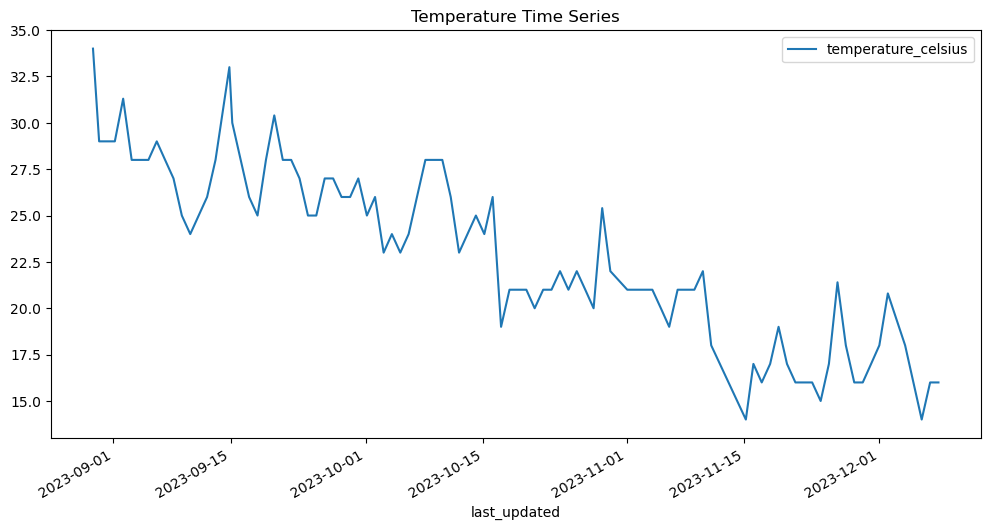

In [23]:
# Visualize the data
weather_data.plot(figsize=(12, 6), title='Temperature Time Series')

In [24]:
weather_data = weather_data[['temperature_celsius']]
weather_data

,temperature_celsius
last_updated,
2023-08-29 15:00:00,34.0
2023-08-30 08:30:00,29.0
2023-08-31 05:15:00,29.0
2023-09-01 05:15:00,29.0
2023-09-02 05:00:00,31.3
...,...
2023-12-02 00:45:00,20.8
2023-12-04 02:00:00,18.0
2023-12-06 01:15:00,14.0


# ADF

In [25]:
from statsmodels.tsa.stattools import adfuller

## Perform ADF test
result = adfuller(weather_data['temperature_celsius'])

# Extract and print the results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. The data is stationary.")
else:
    print("Fail to reject the null hypothesis. The data is non-stationary.")

ADF Statistic: -0.8497058022801368
p-value: 0.8040837772077893
Critical Values:
   1%: -3.505190196159122
   5%: -2.894232085048011
   10%: -2.5842101234567902
Fail to reject the null hypothesis. The data is non-stationary.


## Decomposition

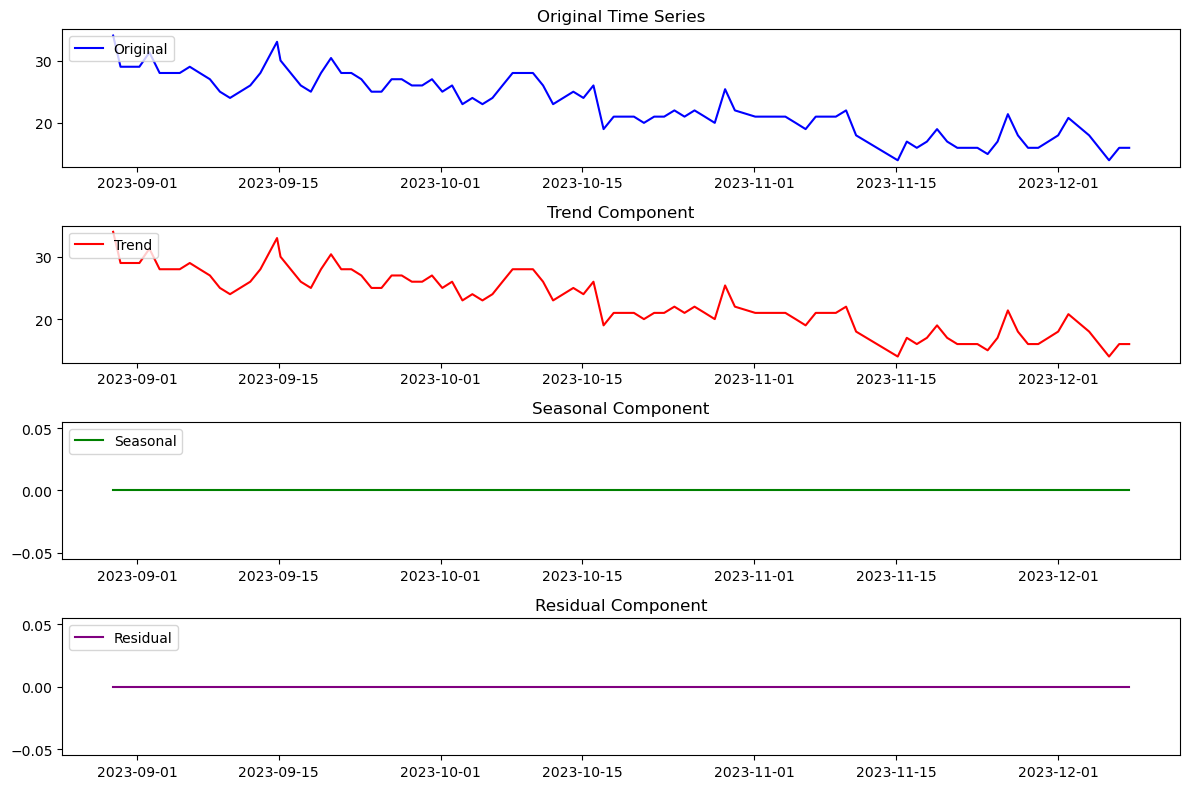

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming weather_data is your DataFrame with 'last_updated' as the datetime index
# and 'temperature_celsius' as the target variable

# Perform seasonal decomposition
decomposition = seasonal_decompose(weather_data['temperature_celsius'], model='additive',period = 1)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(weather_data.index, weather_data['temperature_celsius'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(weather_data.index, decomposition.trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(weather_data.index, decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(weather_data.index, decomposition.resid, label='Residual', color='purple')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


##  Detrend data using differencing

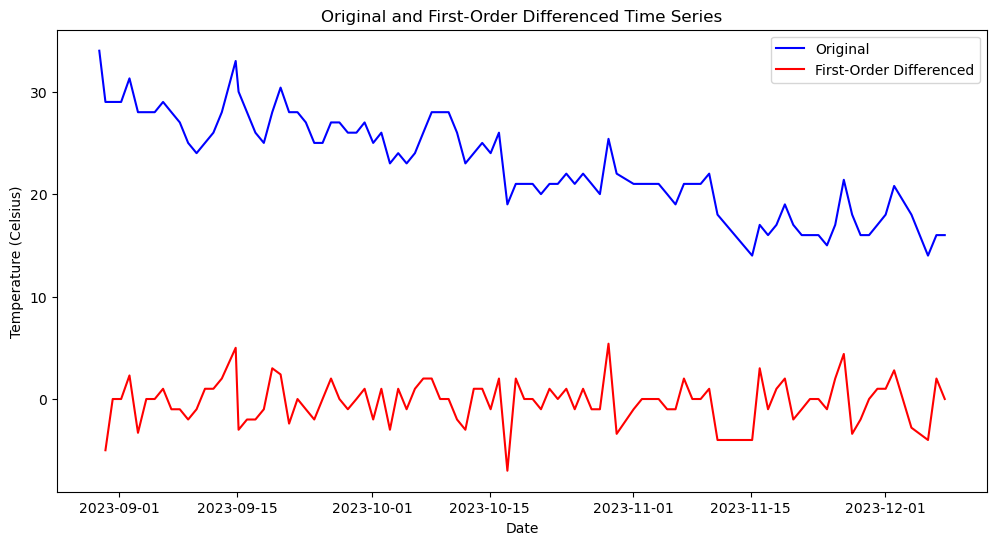

In [27]:
# Assuming weather_data is your DataFrame with 'last_updated' as the datetime index
# and 'temperature_celsius' as the target variable

# Compute first-order difference
weather_data['temperature_celsius_diff'] = weather_data['temperature_celsius'].diff()

# Plot the original and differenced time series
plt.figure(figsize=(12, 6))
plt.plot(weather_data.index, weather_data['temperature_celsius'], label='Original', color='blue')
plt.plot(weather_data.index, weather_data['temperature_celsius_diff'], label='First-Order Differenced', color='red')
plt.title('Original and First-Order Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()


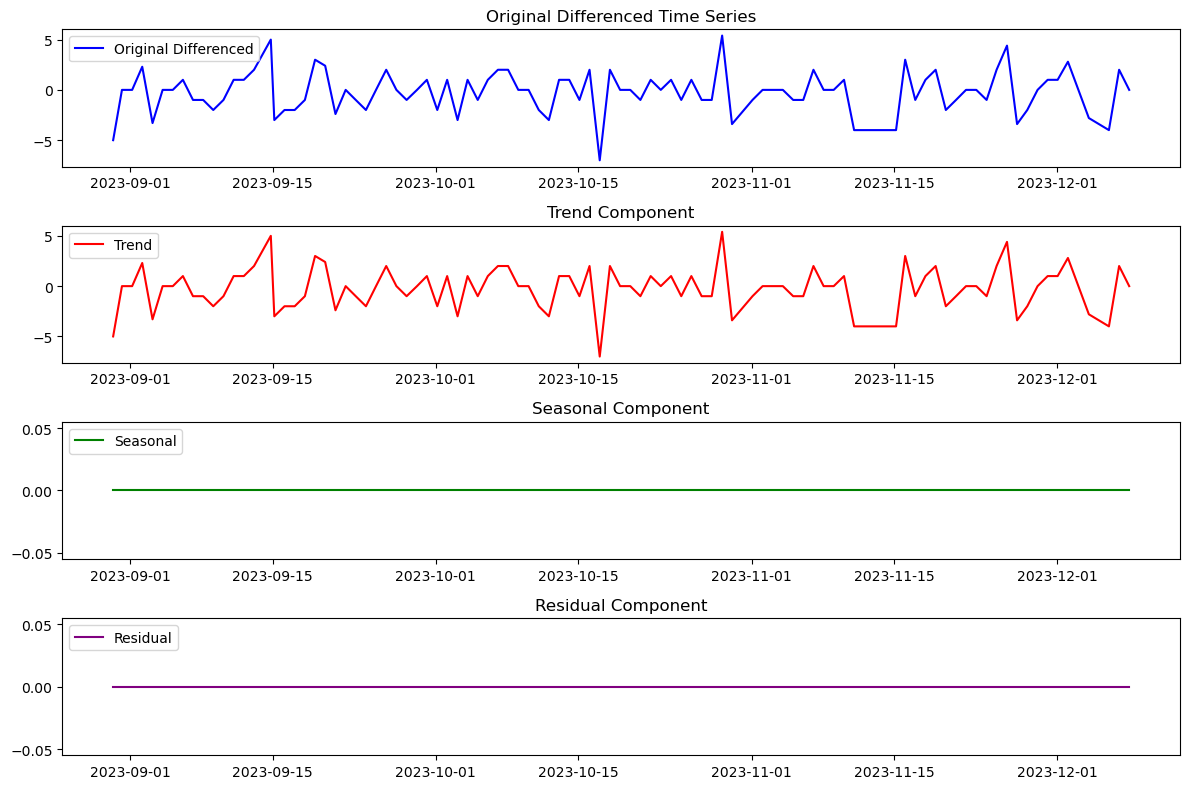

In [28]:
# Assuming weather_data is your DataFrame with 'last_updated' as the datetime index
# and 'temperature_celsius' as the target variable

# Compute first-order difference
weather_data['temperature_celsius_diff'] = weather_data['temperature_celsius'].diff()

# Drop any missing values created by differencing
weather_data.dropna(inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(weather_data['temperature_celsius_diff'], model='additive',period = 1)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(weather_data.index, weather_data['temperature_celsius_diff'], label='Original Differenced', color='blue')
plt.legend(loc='upper left')
plt.title('Original Differenced Time Series')

plt.subplot(412)
plt.plot(weather_data.index, decomposition.trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(weather_data.index, decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(weather_data.index, decomposition.resid, label='Residual', color='purple')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


In [29]:
weather_data.head()

,temperature_celsius,temperature_celsius_diff
last_updated,,
2023-08-30 08:30:00,29.0,-5.0
2023-08-31 05:15:00,29.0,0.0
2023-09-01 05:15:00,29.0,0.0
2023-09-02 05:00:00,31.3,2.3
2023-09-03 05:15:00,28.0,-3.3


# Stationarity

In [30]:
## Perform ADF test
result = adfuller(weather_data['temperature_celsius_diff'])

# Extract and print the results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. The data is stationary.")
else:
    print("Fail to reject the null hypothesis. The data is non-stationary.")

ADF Statistic: -8.07529310407954
p-value: 1.511215265431048e-12
Critical Values:
   1%: -3.505190196159122
   5%: -2.894232085048011
   10%: -2.5842101234567902
Reject the null hypothesis. The data is stationary.


# ACF and PACF

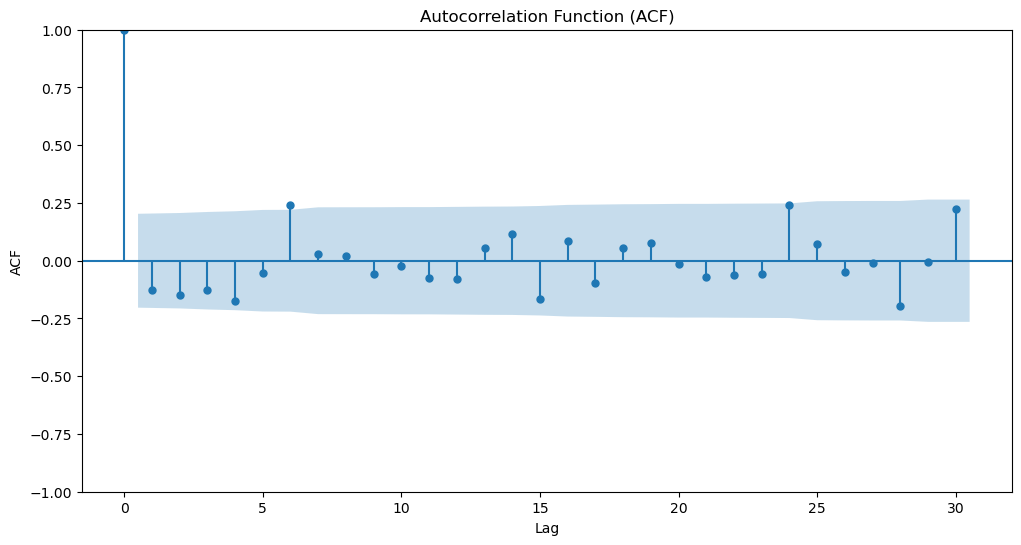

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming weather_data is your DataFrame with 'last_updated' as the datetime index
# and 'temperature_celsius' as the target variable

# Filter data within the specified date range
start_date = '2023-08-29'
end_date = '2023-12-07'
weather_data_filtered = weather_data[(weather_data.index >= start_date) & (weather_data.index <= end_date)]

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(weather_data_filtered['temperature_celsius_diff'], lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()



C:\Users\Shweta\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


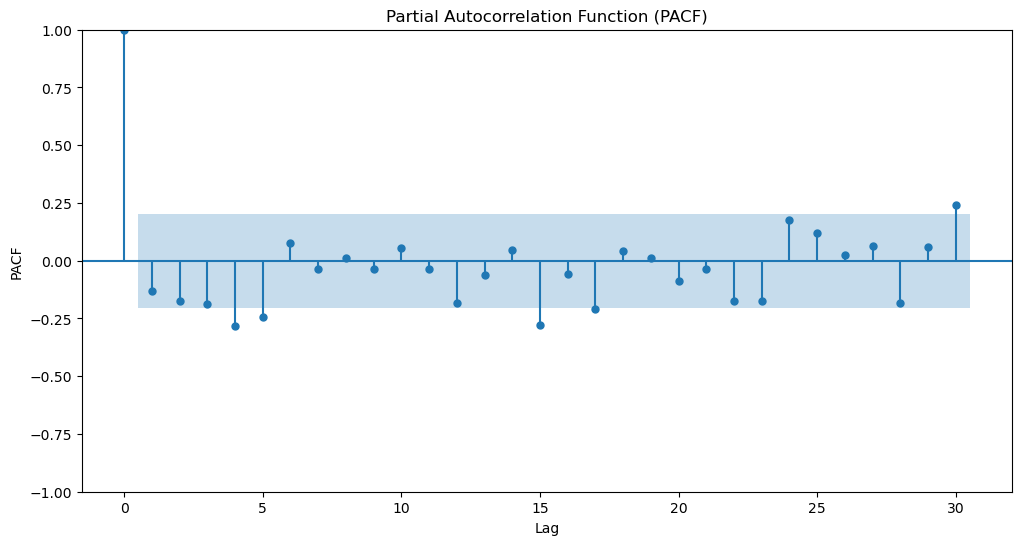

In [32]:
# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(weather_data_filtered['temperature_celsius_diff'], lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

# Paramter estimation

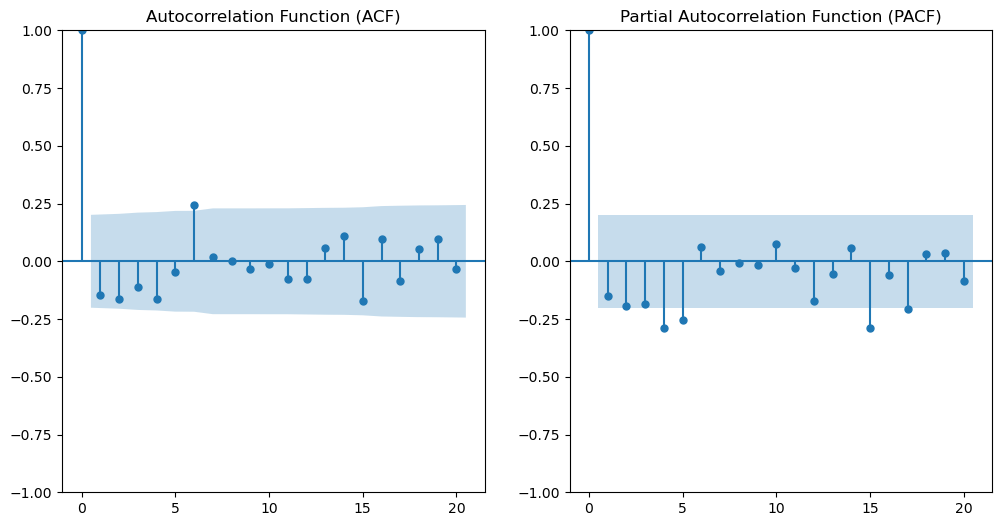

Estimated AR order (p): 1
Estimated MA order (q): 1


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming weather_data is your DataFrame with 'last_updated' as the datetime index
# and 'temperature_celsius' as the target variable

# Compute ACF and PACF
acf_values = acf(weather_data['temperature_celsius_diff'], fft=True)
pacf_values = pacf(weather_data['temperature_celsius_diff'])

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(weather_data['temperature_celsius_diff'], ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(weather_data['temperature_celsius_diff'], ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Estimate parameters using visual inspection
# Determine p (AR order) from PACF plot and q (MA order) from ACF plot
p = np.where(pacf_values < 0.05)[0][0]  # Adjust threshold as needed
q = np.where(acf_values < 0.05)[0][0]  # Adjust threshold as needed

# You may set d to 1 if the data was differenced once to achieve stationarity

print(f'Estimated AR order (p): {p}')
print(f'Estimated MA order (q): {q}')


# Fit the ARIMA model

In [34]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming weather_data is your DataFrame with 'last_updated' as the datetime index
# and 'temperature_celsius' as the target variable

# Define the ARIMA model parameters (p, d, q)
p = 1  # Autoregressive order
d = 1  # Differencing order
q = 1  # Moving average order

# Fit the ARIMA model
model = ARIMA(weather_data['temperature_celsius_diff'], order=(p, d, q))
result = model.fit()

# Print model summary
print(result.summary())


                                  SARIMAX Results                                   
Dep. Variable:     temperature_celsius_diff   No. Observations:                   95
Model:                       ARIMA(1, 1, 1)   Log Likelihood                -203.897
Date:                      Fri, 16 Feb 2024   AIC                            413.795
Time:                              22:56:25   BIC                            421.425
Sample:                                   0   HQIC                           416.877
                                       - 95                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1447      0.103     -1.407      0.160      -0.346       0.057
ma.L1         -0.9998      8.822     -0.113      0.910     -18.290      16.291
sigm

C:\Users\Shweta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shweta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shweta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


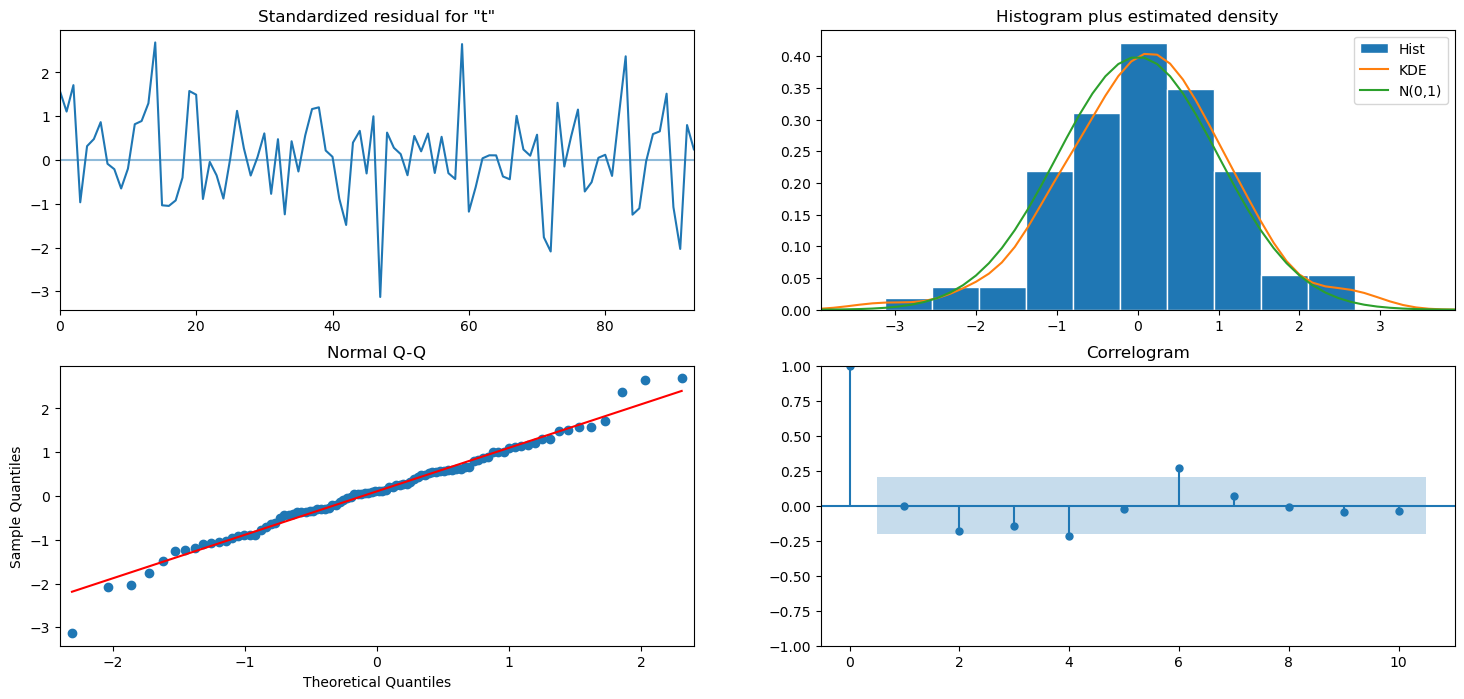

In [35]:
result.plot_diagnostics(figsize=(18, 8))
plt.show()

C:\Users\Shweta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shweta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shweta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shweta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Mean Absolute Error (MAE): 1.76
Mean Squared Error (MSE): 4.65
Root Mean Squared Error (RMSE): 2.16


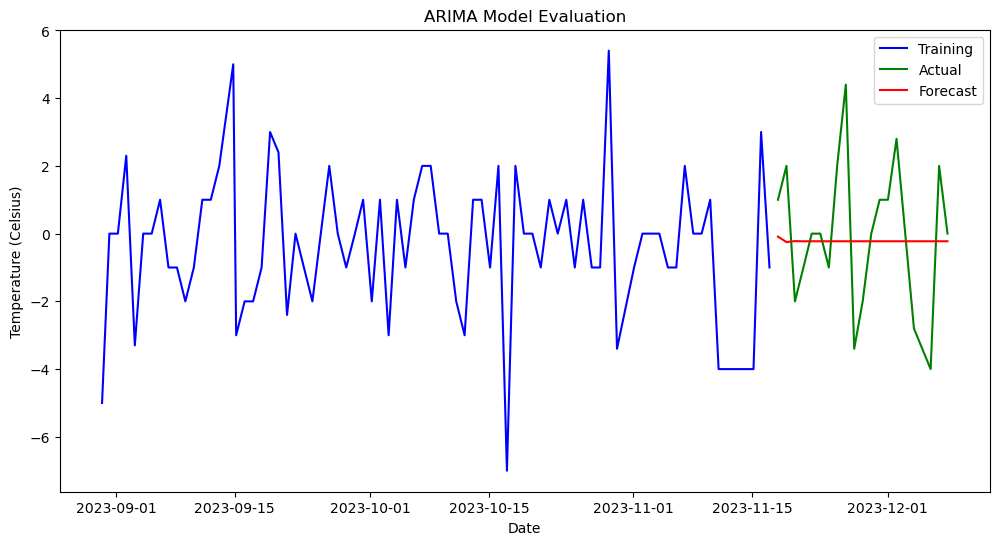

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming weather_data is your DataFrame with 'last_updated' as the datetime index
# and 'temperature_celsius' as the target variable

# Step 1: Train-Test Split
train_size = int(len(weather_data['temperature_celsius_diff']) * 0.8)  # 80% for training
train, test = weather_data[:train_size], weather_data[train_size:]

# Step 2: Model Fitting
p, d, q = 1, 1, 1  # Adjust these values based on your analysis
model = ARIMA(train['temperature_celsius_diff'], order=(p, d, q))
fit_result = model.fit()

# Step 3: Forecasting
forecast_steps = len(test)
forecast_result = fit_result.get_forecast(steps=forecast_steps)

# Step 4: Performance Metrics
forecast_values = forecast_result.predicted_mean
actual_values = test['temperature_celsius_diff']

mae = mean_absolute_error(actual_values, forecast_values)
mse = mean_squared_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Step 5: Visual Inspection
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['temperature_celsius_diff'], label='Training', color='blue')
plt.plot(test.index, actual_values, label='Actual', color='green')
plt.plot(test.index, forecast_values, label='Forecast', color='red')
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()


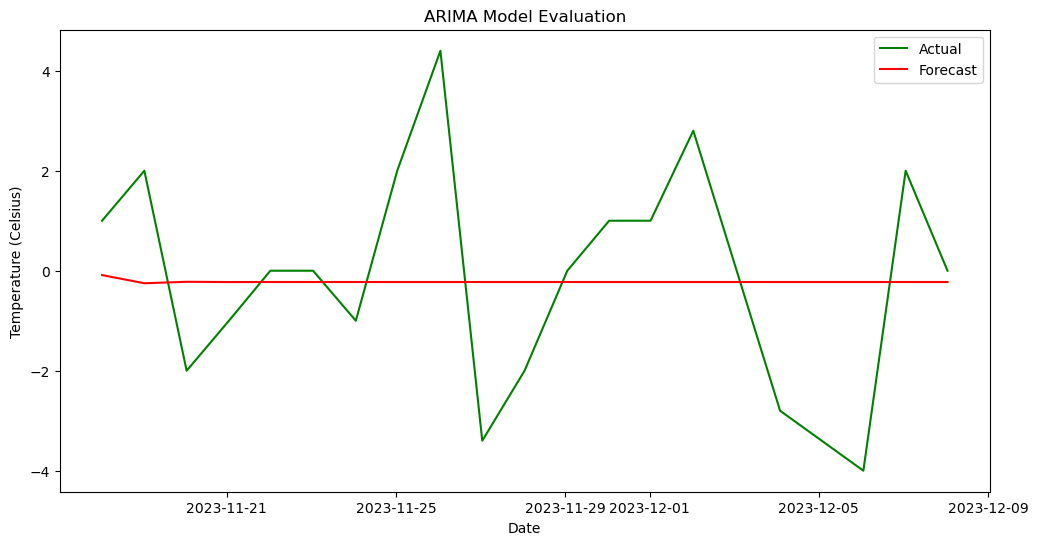

In [37]:
# Step 4: Performance Metrics
forecast_values = forecast_result.predicted_mean
actual_values = test['temperature_celsius_diff']  # Assuming this is the same length as forecast_values

# Step 5: Visual Inspection
plt.figure(figsize=(12, 6))
plt.plot(test.index, actual_values, label='Actual', color='green')
plt.plot(test.index, forecast_values, label='Forecast', color='red')
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()


C:\Users\Shweta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shweta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shweta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shweta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Forecasted values for the next 20 days:
95    -0.209829
96    -0.179468
97    -0.183861
98    -0.183225
99    -0.183317
100   -0.183304
101   -0.183306
102   -0.183306
103   -0.183306
104   -0.183306
105   -0.183306
106   -0.183306
107   -0.183306
108   -0.183306
109   -0.183306
110   -0.183306
111   -0.183306
112   -0.183306
113   -0.183306
Name: predicted_mean, dtype: float64


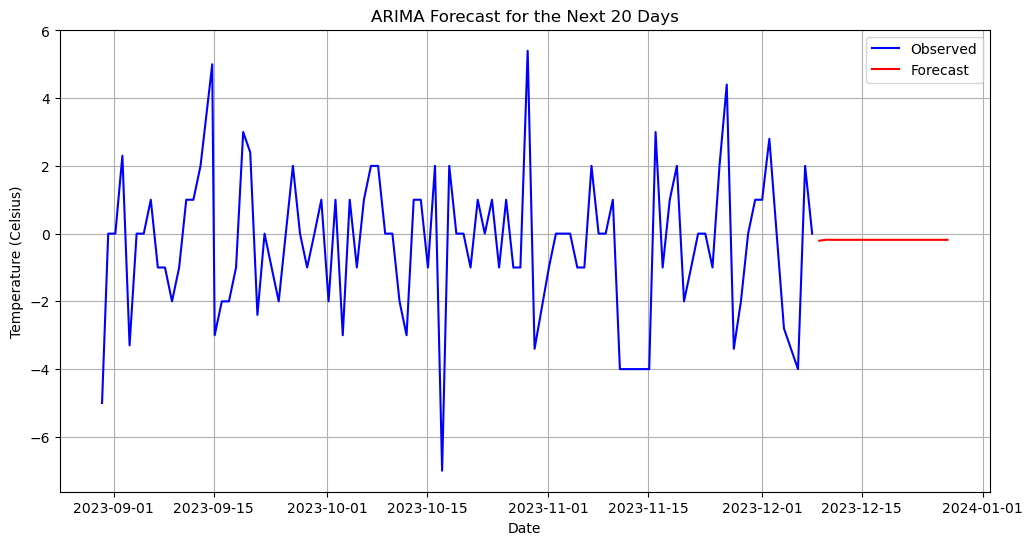

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming weather_data is your DataFrame with 'last_updated' as the datetime index
# and 'temperature_celsius' as the target variable

# Step 1: Fit the ARIMA model to the entire dataset
p, d, q = 1, 1, 1  # Adjust these values based on your analysis
model = ARIMA(weather_data['temperature_celsius_diff'], order=(p, d, q))
fit_result = model.fit()

# Step 2: Make forecasts for the next 20 days
forecast_steps = 19
forecast_result = fit_result.forecast(steps=forecast_steps)

# Optionally, print the forecasted values
print('Forecasted values for the next 20 days:')
print(forecast_result)

# Optionally, plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(weather_data.index, weather_data['temperature_celsius_diff'], label='Observed', color='blue')
plt.plot(pd.date_range(start=weather_data.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast_result, label='Forecast', color='red')
plt.title('ARIMA Forecast for the Next 20 Days')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.grid(True)
plt.show()
